In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt,pylab
import warnings
from imblearn.combine import SMOTETomek
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import  XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math



In [2]:
pip install xgboost

In [3]:
data = pd.read_csv("/content/marketing_sample_for_walmart_com-product_details__20200101_20200331__30k_data.csv")
data.head()

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,51b010b871cde349bd32159a1cc1a15f,2020-01-24 16:08:36 +0000,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,We aim to show you accurate product informati...,11.11,11.11,Cardinal Health,NaN,707389636164,NaN,Health | Medicine Cabinet | Thermometers | Dig...,NaN,True
1,d6a7f100e44a626a3701804e99236ad6,2020-01-24 15:54:21 +0000,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,We aim to show you accurate product informati...,23.99,23.99,Kenneth Cole,NaN,191565696101,NaN,Premium Beauty | Premium Fragrance | Premium P...,NaN,True
2,99d2b7da7e3e427a942f864937dacd9d,2020-01-24 18:34:28 +0000,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,We aim to show you accurate product informati...,30.76,30.76,BONK FIT,563852139.0,855523007070,NaN,Sports & Outdoors | Outdoor Sports | Hunting |...,NaN,True
3,4c76d170c2c6a759cbce812d790a0b88,2020-01-24 11:08:53 +0000,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,We aim to show you accurate product informati...,6.99,6.99,The First Years,553299941.0,71463046263,NaN,Baby | Diapering | Baby Wipes,NaN,True
4,8ac95837dc8baa01e504fd8f633ffaf2,2020-03-10 07:37:21 +0000,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,We aim to show you accurate product informatio...,28.27,28.27,MD USA,NaN,191897514500,NaN,Health | Diabetes Care | Diabetic Socks,NaN,True


In [4]:
data.shape

(30000, 14)

In [5]:
data.isnull().sum().sum()

81989

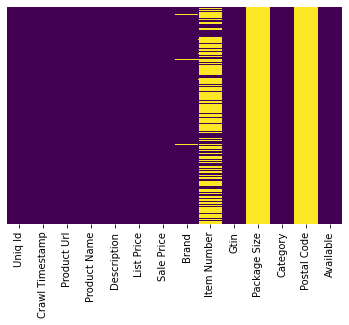

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data['Postal Code'].isnull().sum()

30000

In [8]:
data['Package Size'].isnull().sum()

30000

In [9]:
data['Item Number'].isnull().sum()

21446

In [10]:
data.drop(['Postal Code','Package Size','Item Number','Uniq Id'],axis=1,inplace=True)

In [11]:
data.shape

(30000, 10)

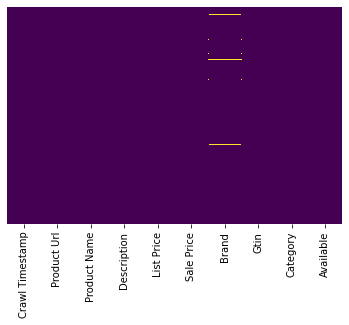

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
data.isnull().sum()

Crawl Timestamp      0
Product Url          0
Product Name         0
Description          0
List Price           0
Sale Price           0
Brand              519
Gtin                 0
Category            24
Available            0
dtype: int64

In [14]:
data.Brand.dtypes

dtype('O')

In [15]:
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])

In [16]:
data.Brand.isnull().sum()

0

In [17]:
data['Category'] = data['Category'].fillna(data['Category'].mode()[0])

In [18]:
data['Available'] = data['Available'].fillna(data['Category'].mode()[0])

In [19]:
data.Category.isnull().sum()

0

In [20]:
data.isnull().sum()

Crawl Timestamp    0
Product Url        0
Product Name       0
Description        0
List Price         0
Sale Price         0
Brand              0
Gtin               0
Category           0
Available          0
dtype: int64

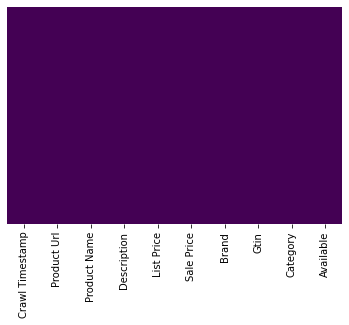

In [21]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
data.dtypes

Crawl Timestamp     object
Product Url         object
Product Name        object
Description         object
List Price         float64
Sale Price         float64
Brand               object
Gtin                 int64
Category            object
Available             bool
dtype: object

In [23]:
data['Crawl Timestamp'] = pd.to_datetime(data['Crawl Timestamp'])

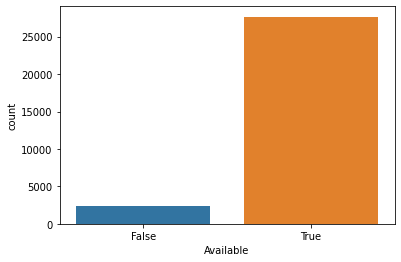

In [24]:
sns.countplot(x='Available',data=data)

In [25]:
data.describe()

,List Price,Sale Price,Gtin
count,30000.000000,30000.000000,3.000000e+04
mean,71.117899,70.426723,4.396451e+11
std,365.596356,364.367234,3.503177e+11
min,0.000000,0.000000,1.523300e+04
25%,10.860000,10.690000,4.113253e+10
50%,20.880000,20.445000,6.356353e+11
75%,45.950000,45.000000,7.526152e+11
max,22434.040000,22434.040000,9.995659e+11


[]

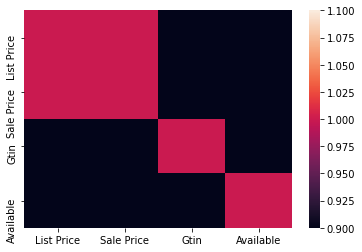

In [26]:
cm = data.corr()
ax=sns.heatmap(cm,vmin=1,vmax=1)
ax.plot()


In [27]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

corr_features = correlation(data,0.90)
len(set(corr_features))
corr_features 

{'Sale Price'}

In [28]:
data.drop('Sale Price',axis=1,inplace=True)

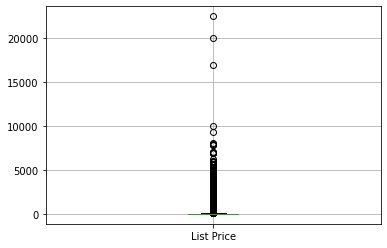

In [29]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])


In [30]:
for x in float_column:
  desc = data[x].describe()
  IQR = desc['75%']- desc['25%']
  UT = desc['75%']+1.5*IQR
  LT = desc['25%']-1.5*IQR
  data[x][data[x]>UT] = UT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


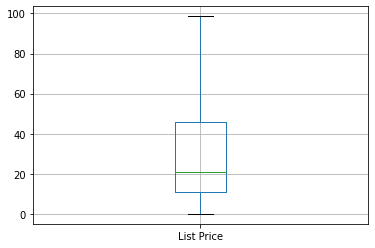

In [31]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

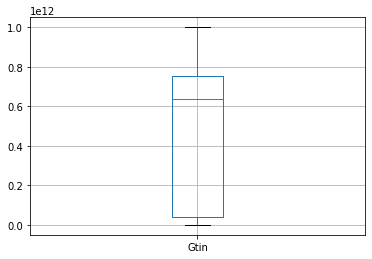

In [32]:
int_column = data.dtypes[data.dtypes=='int64'].index
for x in int_column:
  plt.figure()
  data.boxplot([x])

In [33]:
def plot_data(data,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[features].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[features],dist='norm',plot=pylab)
  plt.show()


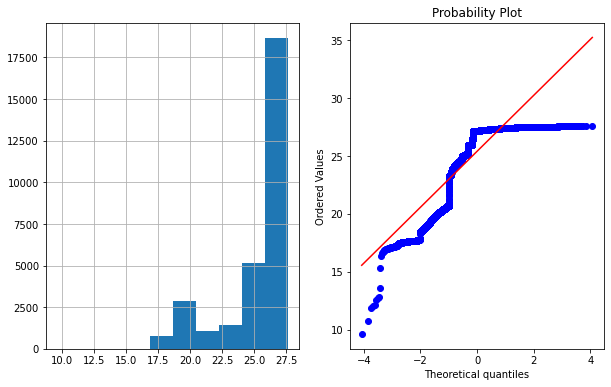

In [34]:
data['Gtin']=np.log(data['Gtin'])
plot_data(data,'Gtin')


In [35]:
x= data.drop('Available',axis=1)

In [36]:
y = data['Available']

In [37]:
lab_enc = LabelEncoder()

In [38]:
x = x.apply(lab_enc.fit_transform)

In [39]:
x.shape

(30000, 8)

In [40]:
smk = SMOTETomek(random_state=0)

In [41]:
x_res,y_res = smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
print("Orginal data {}".format(Counter(y)))
print("Smotetomek data {}".format(Counter(y_res)))

Orginal data Counter({True: 27661, False: 2339})
Smotetomek data Counter({True: 27448, False: 27448})


In [43]:
x_res.shape,y_res.shape

((54896, 8), (54896,))

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.30,random_state = 42)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38427, 8), (16469, 8), (38427,), (16469,))

In [46]:
LR_Model = Pipeline([('model',LogisticRegression(random_state=2))])

In [47]:
RFR_Model = Pipeline([('model',RandomForestRegressor(random_state=2))])

In [48]:
DTR_Model = Pipeline([('model',DecisionTreeRegressor(random_state=2))])

In [49]:
KNR_Model = Pipeline([('model',KNeighborsRegressor())])

In [50]:
SVR_model = Pipeline([('model',SVR())])

In [51]:
XGBST_model = Pipeline([('model',XGBRegressor())])

In [52]:
pipeline = [LR_Model,RFR_Model,DTR_Model,KNR_Model,SVR_model,XGBST_model]

In [53]:
Best_accuracy = 0.0
Best_classifier = 0
Best_pipeline = ""

In [54]:
pip_dic = {0:'LogisticRegression',1: 'RandomForestClassifier',2: 'DecisionTreeClassifier',3:'KNR_Model',4:'SVR_model',5:'XGBST_model'}

In [55]:
for pipe in pipeline:
  pipe.fit(x_train,y_train)


[05:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
for i,model in enumerate(pipeline):
  print("{}Test Accuracy : {}".format(pip_dic[i],model.score(x_train,y_train)))

LogisticRegressionTest Accuracy : 0.5586436620084836
RandomForestClassifierTest Accuracy : 0.9580763526860014
DecisionTreeClassifierTest Accuracy : 1.0
KNR_ModelTest Accuracy : 0.7550637664482238
SVR_modelTest Accuracy : 0.012431421961140221
XGBST_modelTest Accuracy : 0.22960166040579102


In [57]:
for i,model in enumerate(pipeline):
  if model.score(x_test,y_test)>Best_accuracy:
    Best_accuracy=model.score(x_test,y_test)
    Best_pipeline = model
    Best_classifier = i
print('Best Classifier with best accuracy :{}'.format(pip_dic[Best_classifier]))

Best Classifier with best accuracy :RandomForestClassifier


In [58]:
RFR = RandomForestRegressor()

In [59]:
n_estimators = [30,50,80,100]
max_depth = [5, 8, 10,12]
min_samples_split = [2, 5, 10, 15, 25]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RFR, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 71.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 91.6min finished


In [60]:
bestF.best_params_

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [64]:
RFRegressor =RandomForestRegressor(n_estimators=50,max_depth=12,min_samples_leaf=1,min_samples_split=5,criterion='mse')

In [65]:
RFRegressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred = RFRegressor.predict(x_test)

In [67]:
y_pred 

array([0.66072777, 0.63202976, 0.71007193, ..., 1.        , 0.95842643,
       0.43358726])

In [71]:
mean_absolute_error(y_test,y_pred)

0.3582281673492311

In [72]:
mean_squared_error(y_test,y_pred)

0.1637660083664742

In [74]:
# np.sqrt(mean_squared_error(y_test,y_pred))

0.0

In [75]:
mse  = mean_squared_error(y_test,y_pred)

In [76]:
math.sqrt(mse)

0.0